In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial # 多项分布
from d2l import torch as d2l

In [4]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()  # `1`表示抽样的次数


tensor([0., 0., 0., 1., 0., 0.])

In [5]:
multinomial.Multinomial(10, fair_probs).sample()  # 10次实验，每次实验的概率为fair_probs


tensor([4., 0., 1., 2., 2., 1.])

In [6]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值


tensor([0.1560, 0.1500, 0.1920, 0.1500, 0.1770, 0.1750])

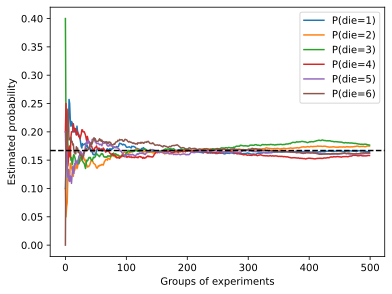

In [8]:
# 10次投掷，500次实验
counts = multinomial.Multinomial(10, fair_probs).sample((500, )) # type: ignore
cum_counts = counts.cumsum(dim=0)  # 按列累加
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True)  # 按行归一化

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black',
                linestyle='dashed')  # 添加一条水平的虚线，y=0.167，表示真实的概率值
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()


----------------------------------

### 联合概率

- *联合概率*（joint probability）$P(A=a,B=b)$。

- 给定任意值$a$和$b$，联合概率可以回答：$A=a$和$B=b$同时满足的概率是多少？

- 请注意，对于任何$a$和$b$的取值，$P(A = a, B=b) \leq P(A=a)$。

- 这点是确定的，因为要同时发生$A=a$和$B=b$，$A=a$就必须发生，$B=b$也必须发生（反之亦然）。**因此，$A=a$和$B=b$同时发生的可能性不大于$A=a$或是$B=b$单独发生的可能性**。

### 条件概率

联合概率的不等式带给我们一个有趣的比率：
$0 \leq \frac{P(A=a, B=b)}{P(A=a)} \leq 1$。

我们称这个比率为*条件概率*（conditional probability），

并用$P(B=b \mid A=a)$表示它：它是$B=b$的概率，前提是$A=a$已发生。

### 贝叶斯定理

使用条件概率的定义，我们可以得出统计学中最有用的方程之一：*Bayes定理*（Bayes' theorem）。根据*乘法法则*（multiplication rule ）可得到$P(A, B) = P(B \mid A) P(A)$。根据对称性，可得到$P(A, B) = P(A \mid B) P(B)$。假设$P(B)>0$，求解其中一个条件变量，我们得到

$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}.$$

请注意，这里我们使用紧凑的表示法：其中$P(A, B)$是一个*联合分布*（joint distribution），$P(A \mid B)$是一个*条件分布*（conditional distribution）。这种分布可以在给定值$A = a, B=b$上进行求值。

### 边际化

为了能进行事件概率求和，我们需要*求和法则*（sum rule），**即$B$的概率相当于计算$A$的所有可能选择，并将所有选择的联合概率聚合在一起：**

$$P(B) = \sum_{A} P(A, B),$$

这也称为*边际化*（marginalization）。边际化结果的概率或分布称为*边际概率*（marginal probability）或*边际分布*（marginal distribution）。

### 独立性

另一个有用属性是*依赖*（dependence）与*独立*（independence）。**如果两个随机变量$A$和$B$是独立的，意味着事件$A$的发生跟$B$事件的发生无关。**
在这种情况下，统计学家通常将这一点表述为$A \perp  B$。根据贝叶斯定理，马上就能同样得到$P(A \mid B) = P(A)$。在所有其他情况下，我们称$A$和$B$依赖。比如，两次连续抛出一个骰子的事件是相互独立的。相比之下，灯开关的位置和房间的亮度并不是（因为可能存在灯泡坏掉、电源故障，或者开关故障）。

**由于$P(A \mid B) = \frac{P(A, B)}{P(B)} = P(A)$等价于$P(A, B) = P(A)P(B)$，**因此两个随机变量是独立的，**当且仅当**两个随机变量的联合分布是其各自分布的乘积。同样地，给定另一个随机变量$C$时，两个随机变量$A$和$B$是**条件独立的**（conditionally independent），当且仅当$P(A, B \mid C) = P(A \mid C)P(B \mid C)$。这个情况表示为$A \perp B \mid C$。

-----------------------------------

### 应用

假设一个医生对患者进行艾滋病病毒（HIV）测试。这个测试是相当准确的，如果患者健康但测试显示他患病，这个概率只有1%；**如果患者真正感染HIV，它永远不会检测不出。**我们使用$D_1$来表示诊断结果（如果阳性，则为$1$，如果阴性，则为$0$），$H$来表示感染艾滋病病毒的状态（如果阳性，则为$1$，如果阴性，则为$0$）。

- 条件概率为$P(D_1 \mid H)$

| 条件概率 | $H=1$ | $H=0$ |
|:---:|:---:|:---:|
|$P(D_1 = 1 \mid H)$|            1 |         0.01 |
|$P(D_1 = 0 \mid H)$|            0 |         0.99 |

请注意，**每列的加和都是1（但每行的加和不是）**，因为条件概率需要总和为1，就像概率一样。让我们计算如果测试出来呈阳性，患者感染HIV的概率，即$P(H = 1 \mid D_1 = 1)$。显然，这将取决于疾病有多常见，因为它会影响错误警报的数量。假设人口总体是相当健康的，例如，$P(H=1) = 0.0015$。为了应用贝叶斯定理，我们需要运用边际化和乘法法则来确定

$$\begin{aligned}
&P(D_1 = 1) \\
=& P(D_1=1, H=0) + P(D_1=1, H=1)  \\
=& P(D_1=1 \mid H=0) P(H=0) + P(D_1=1 \mid H=1) P(H=1) \\
=& 0.011485.
\end{aligned}
$$
因此，我们得到

$$\begin{aligned}
&P(H = 1 \mid D_1 = 1)\\ =& \frac{P(D_1=1 \mid H=1) P(H=1)}{P(D_1=1)} \\ =& 0.1306 \end{aligned}.$$

换句话说，**尽管使用了非常准确的测试，患者实际上患有艾滋病的几率只有13.06%。正如我们所看到的，概率可能是违反直觉的。**

患者在收到这样可怕的消息后应该怎么办？很可能，患者会要求医生进行另一次测试来确定病情。**第二个测试具有不同的特性，它不如第一个测试那么精确**

- 条件概率为$P(D_2 \mid H)$

| 条件概率 | $H=1$ | $H=0$ |
|:---:|:---:|:---:|
|$P(D_2 = 1 \mid H)$|            0.98 |         0.03 |
|$P(D_2 = 0 \mid H)$|            0.02 |         0.97 |

不幸的是，第二次测试也显示阳性。让我们通过假设条件独立性来计算出应用Bayes定理的必要概率：

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1 \mid H = 0) \\
=& P(D_1 = 1 \mid H = 0) P(D_2 = 1 \mid H = 0)  \\
=& 0.0003,
\end{aligned}
$$

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1 \mid H = 1) \\
=& P(D_1 = 1 \mid H = 1) P(D_2 = 1 \mid H = 1)  \\
=& 0.98.
\end{aligned}
$$
现在我们可以应用边际化和乘法规则：

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1) \\
=& P(D_1 = 1, D_2 = 1, H = 0) + P(D_1 = 1, D_2 = 1, H = 1)  \\
=& P(D_1 = 1, D_2 = 1 \mid H = 0)P(H=0) + P(D_1 = 1, D_2 = 1 \mid H = 1)P(H=1)\\
=& 0.00176955.
\end{aligned}
$$

最后，鉴于存在两次阳性检测，患者患有艾滋病的概率为

$$\begin{aligned}
&P(H = 1 \mid D_1 = 1, D_2 = 1)\\
=& \frac{P(D_1 = 1, D_2 = 1 \mid H=1) P(H=1)}{P(D_1 = 1, D_2 = 1)} \\
=& 0.8307.
\end{aligned}
$$

**也就是说，第二次测试使我们能够对患病的情况获得更高的信心。尽管第二次检验比第一次检验的准确性要低得多，但它仍然显著提高我们的预测概率。**



### 期望和方差

为了概括概率分布的关键特征，我们需要一些测量方法。一个随机变量$X$的*期望*（expectation，或平均值（average））表示为

$$E[X] = \sum_{x} x P(X = x).$$

当函数$f(x)$的输入是从分布$P$中抽取的随机变量时，$f(x)$的期望值为

$$E_{x \sim P}[f(x)] = \sum_x f(x) P(x).$$

在许多情况下，我们希望衡量随机变量$X$与其期望值的偏置。这可以通过**方差**来量化

$$\mathrm{Var}[X] = E\left[(X - E[X])^2\right] = E[X^2] - E[X]^2.$$

方差的平方根被称为*标准差*（standard deviation）。**随机变量函数的方差衡量的是：当从该随机变量分布中采样不同值$x$时，函数值偏离该函数的期望的程度：**

$$\mathrm{Var}[f(x)] = E\left[\left(f(x) - E[f(x)]\right)^2\right].$$